<a href="https://colab.research.google.com/github/harshvardhan176/ML_LAB_01/blob/main/ML_Lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df = pd.read_csv('Wmunu.csv')
feature = ['pt', 'eta', 'phi', 'chiSq', 'dxy', 'iso', 'MET', 'phiMET']

class1 = df[df['Q'] == 1][feature]
class2 = df[df['Q'] == -1][feature]

centroid1 = class1.mean(axis=0)
centroid2 = class2.mean(axis=0)

spread1 = class1.std(axis=0)
spread2 = class2.std(axis=0)

interclass_distance = np.linalg.norm(centroid1 - centroid2)

print("Centroid for Class Q=1:\n", centroid1)
print("\nSpread (Standard Deviation) for Class Q=1:\n", spread1)
print("\nCentroid for Class Q=-1:\n", centroid2)
print("\nSpread (Standard Deviation) for Class Q=-1:\n", spread2)
print("\nInterclass Distance (Euclidean Distance between Centroids):", interclass_distance)


Centroid for Class Q=1:
 pt        38.159227
eta        0.003571
phi        0.005158
chiSq      6.787820
dxy       -0.017080
iso       15.835000
MET       27.457855
phiMET    -0.119904
dtype: float64

Spread (Standard Deviation) for Class Q=1:
 pt        172.327748
eta         1.094644
phi         1.818136
chiSq      64.854480
dxy         2.074335
iso       109.785856
MET        16.741861
phiMET      1.763892
dtype: float64

Centroid for Class Q=-1:
 pt        39.662807
eta       -0.004059
phi        0.003551
chiSq      7.670502
dxy       -0.019729
iso       17.930351
MET       26.128707
phiMET    -0.115775
dtype: float64

Spread (Standard Deviation) for Class Q=-1:
 pt        248.969520
eta         1.060422
phi         1.822796
chiSq      76.186189
dxy         3.214775
iso        34.037462
MET        16.266177
phiMET      1.758647
dtype: float64

Interclass Distance (Euclidean Distance between Centroids): 3.032671038012761


Mean of 'pt': 38.839341684000004
Variance of 'pt': 44301.76543281126


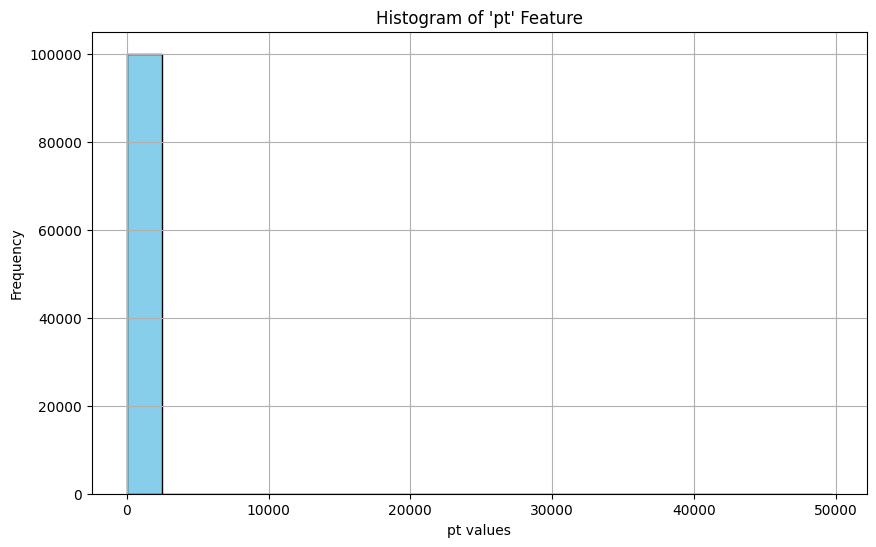

In [3]:
df = pd.read_csv('Wmunu.csv')
feature = 'pt'
data = df[feature]

hist_counts, bin_edges = np.histogram(data, bins=20)
mean_value = np.mean(data)
variance_value = np.var(data)

print(f"Mean of '{feature}': {mean_value}")
print(f"Variance of '{feature}': {variance_value}")
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.title(f"Histogram of '{feature}' Feature")
plt.xlabel(f"{feature} values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

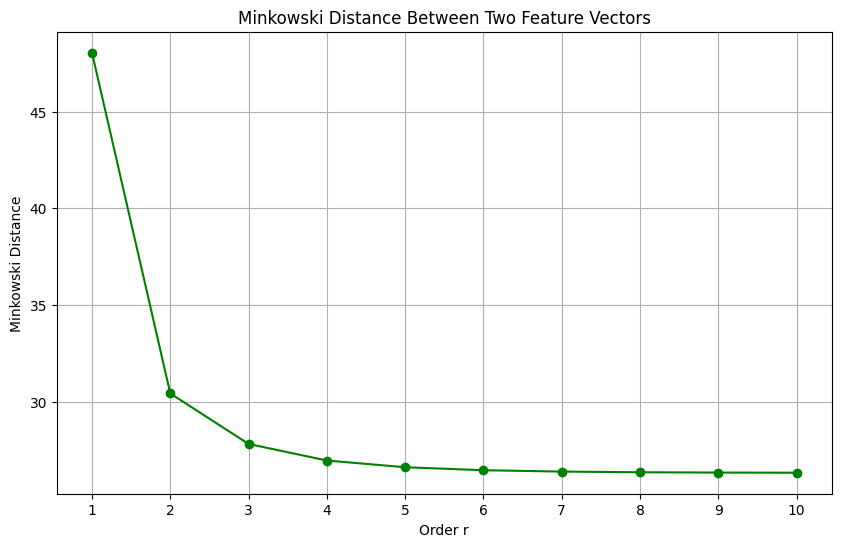

In [4]:
df = pd.read_csv('Wmunu.csv')

features = ['pt', 'eta', 'phi', 'chiSq', 'dxy', 'iso', 'MET', 'phiMET']
vec1 = df.iloc[0][features].values
vec2 = df.iloc[1][features].values

r_values = range(1, 11)
minkowski_distances = [np.linalg.norm(vec1 - vec2, ord=r) for r in r_values]

plt.figure(figsize=(10, 6))
plt.plot(r_values, minkowski_distances, marker='o', linestyle='-', color='green')
plt.title("Minkowski Distance Between Two Feature Vectors")
plt.xlabel("Order r")
plt.ylabel("Minkowski Distance")
plt.grid(True)
plt.xticks(r_values)
plt.show()

In [5]:
df = pd.read_csv('Wmunu.csv')

features = ['pt', 'eta', 'phi', 'chiSq', 'dxy', 'iso', 'MET', 'phiMET']
X = df[features]
y = df['Q']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (70000, 8)
Testing Features Shape: (30000, 8)
Training Labels Shape: (70000,)
Testing Labels Shape: (30000,)


In [16]:
#5
X = df[['pt', 'eta', 'phi', 'chiSq', 'dxy', 'iso', 'MET', 'phiMET']]
y = df['Q']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
df = pd.read_csv('Wmunu.csv')
features = ['pt', 'eta', 'phi', 'chiSq', 'dxy', 'iso', 'MET', 'phiMET']
X = df[features]
y = df['Q']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy of kNN (k=3): {accuracy:.4f}")
print("\nClassification Report:")
print(report)

Accuracy of kNN (k=3): 0.5096

Classification Report:
              precision    recall  f1-score   support

          -1       0.45      0.43      0.44     13483
           1       0.55      0.57      0.56     16517

    accuracy                           0.51     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.51      0.51      0.51     30000



In [14]:
#7
import pandas as pd

y_pred = knn_classifier.predict(X_test)
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

print(results_df.head(10))



   Actual  Predicted
0      -1          1
1      -1          1
2      -1         -1
3      -1          1
4      -1          1
5      -1          1
6       1          1
7       1          1
8       1          1
9       1          1


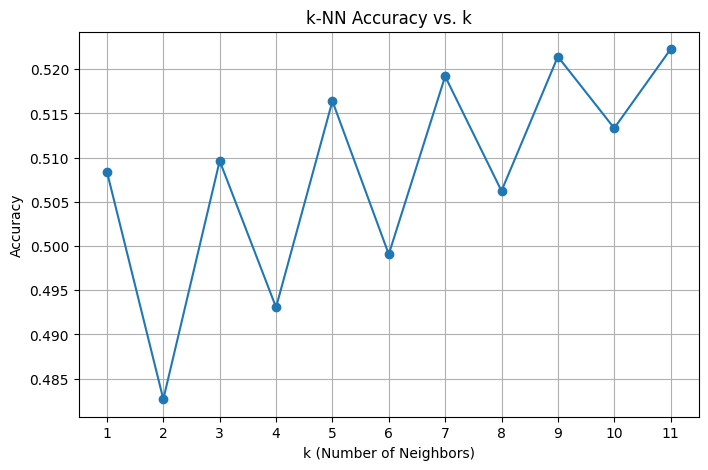

In [11]:
#8
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1, 12))
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    acc = knn_model.score(X_test, y_test)
    accuracies.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('k-NN Accuracy vs. k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()


In [12]:
#9
from sklearn.metrics import confusion_matrix, classification_report
y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Training Set Confusion Matrix:")
print(conf_matrix_train)
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Set Confusion Matrix:")
print(conf_matrix_test)
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Set Confusion Matrix:
[[22401  9349]
 [ 7833 30417]]

Training Set Classification Report:
              precision    recall  f1-score   support

          -1       0.74      0.71      0.72     31750
           1       0.76      0.80      0.78     38250

    accuracy                           0.75     70000
   macro avg       0.75      0.75      0.75     70000
weighted avg       0.75      0.75      0.75     70000


Test Set Confusion Matrix:
[[5862 7621]
 [7090 9427]]

Test Set Classification Report:
              precision    recall  f1-score   support

          -1       0.45      0.43      0.44     13483
           1       0.55      0.57      0.56     16517

    accuracy                           0.51     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.51      0.51      0.51     30000

